In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import nltk
import liwc

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [130]:
data = pd.read_csv('../raw_data/dreaddit-train.csv', parse_dates=True)

In [131]:
cols_to_keep =  ['subreddit',
                 'post_id',
                 'sentence_range',
                 'text',
                 'id',
                 'label',
                 'confidence',
                 'social_timestamp',
                 'social_karma',
                 'social_upvote_ratio',
                 'social_num_comments',
                ]

In [132]:
data = data[cols_to_keep]

In [133]:
data['domain'] = data['subreddit'].map({'domesticviolence': 'abuse',
                                       'survivorsofabuse': 'abuse',
                                       'anxiety': 'anxiety',
                                       'stress': 'anxiety',
                                       'almosthomeless': 'ﬁnancial',
                                       'assistance': 'ﬁnancial',
                                       'food_pantry': 'ﬁnancial',
                                       'homeless':'ﬁnancial',
                                       'ptsd':'ptsd',
                                       'relationships':'social'
                                       })

In [134]:
data.isnull().sum()

subreddit              0
post_id                0
sentence_range         0
text                   0
id                     0
label                  0
confidence             0
social_timestamp       0
social_karma           0
social_upvote_ratio    0
social_num_comments    0
domain                 0
dtype: int64

In [135]:
data.dtypes

subreddit               object
post_id                 object
sentence_range          object
text                    object
id                       int64
label                    int64
confidence             float64
social_timestamp         int64
social_karma             int64
social_upvote_ratio    float64
social_num_comments      int64
domain                  object
dtype: object

In [136]:
data['social_date'] = data['social_timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))
data = data.drop(columns='social_timestamp')

In [137]:
data.dtypes

subreddit                      object
post_id                        object
sentence_range                 object
text                           object
id                              int64
label                           int64
confidence                    float64
social_karma                    int64
social_upvote_ratio           float64
social_num_comments             int64
domain                         object
social_date            datetime64[ns]
dtype: object

#### check distribution of characters within each Reddit post

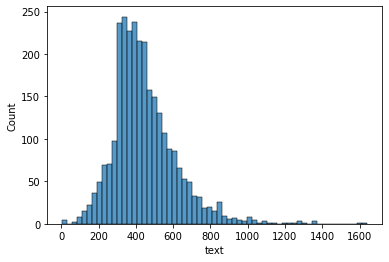

In [138]:
sns.histplot(data['text'].apply(lambda x: len(x)));

In [139]:
rows_to_remove = data['text'].apply(lambda x: len(x)).sort_values().head(5).index.to_list()

In [140]:
data.iloc[rows_to_remove]

,subreddit,post_id,sentence_range,text,id,label,confidence,social_karma,social_upvote_ratio,social_num_comments,domain,social_date
1592,anxiety,7ti69n,"[15, 20]",#NAME?,469,1,0.571429,3,1.00,7,anxiety,2018-01-28 04:36:40
295,domesticviolence,7idwpv,"(10, 15)",#NAME?,31315,0,0.800000,10,0.92,9,abuse,2017-12-08 09:21:17
2190,ptsd,9ut4zv,"[30, 35]",#NAME?,559,1,1.000000,9,0.85,9,ptsd,2018-11-06 22:25:11
2563,domesticviolence,8m1irj,"(15, 20)",#NAME?,29201,0,0.800000,23,1.00,4,abuse,2018-05-25 13:55:30
854,assistance,60cpir,"[10, 15]",<url> Resume: <url> Thank you! !,806,0,0.571429,16,0.90,11,ﬁnancial,2017-03-19 22:05:04


In [141]:
data.shape

(2838, 12)

In [142]:
data.drop(labels=rows_to_remove, inplace=True )

In [143]:
data.shape

(2833, 12)

In [144]:
data['pct_caps'] = data['text'].apply(lambda x: sum([char.isupper() for char in x])/len(x) )
data['text'] = data['text'].apply(lambda x: x.lower())

In [145]:
data.to_csv('../raw_data/dreaddit-exp.csv',index=False, columns=['id','text'] )

## Magic

In [149]:
liwc_vectorized = pd.read_csv('../raw_data/LIWC2015 Results (dreaddit-exp).csv', )

In [160]:
liwc_vectorized.columns = ["liwc_"+col for col in liwc_vectorized.columns]

liwc_vectorized.rename(columns={'liwc_Source (A)':'id',
                                'liwc_Source (B)':'text'}, inplace=True)
liwc_vectorized.drop(columns='text', inplace=True)

data = data.merge(liwc_vectorized, on='id')

In [191]:
liwc_vectorized_stress = pd.read_csv('../raw_data/LIWC2015 Results (dreaddit-exp) STRESS.csv', )

In [192]:
liwc_vectorized_stress.columns = ["liwc_"+col for col in liwc_vectorized_stress.columns]

liwc_vectorized_stress.rename(columns={'liwc_Source (A)':'id',
                                'liwc_Source (B)':'text'}, inplace=True)
liwc_vectorized_stress.drop(columns='text', inplace=True)

data = data.merge(liwc_vectorized_stress, on='id')

In [202]:
data.describe()

,id,label,confidence,social_karma,social_upvote_ratio,social_num_comments,pct_caps,liwc_WC,liwc_Analytic,liwc_Clout,liwc_Authentic,liwc_Tone,liwc_WPS,liwc_Sixltr,liwc_Dic,liwc_function,liwc_pronoun,liwc_ppron,liwc_i,liwc_we,liwc_you,liwc_shehe,liwc_they,liwc_ipron,liwc_article,liwc_prep,liwc_auxverb,liwc_adverb,liwc_conj,liwc_negate,liwc_verb,liwc_adj,liwc_compare,liwc_interrog,liwc_number,liwc_quant,liwc_affect,liwc_posemo,liwc_negemo,liwc_anx,liwc_anger,liwc_sad,liwc_social,liwc_family,liwc_friend,liwc_female,liwc_male,liwc_cogproc,liwc_insight,liwc_cause,...,liwc_tentat,liwc_certain,liwc_differ,liwc_percept,liwc_see,liwc_hear,liwc_feel,liwc_bio,liwc_body,liwc_health,liwc_sexual,liwc_ingest,liwc_drives,liwc_affiliation,liwc_achieve,liwc_power,liwc_reward,liwc_risk,liwc_focuspast,liwc_focuspresent,liwc_focusfuture,liwc_relativ,liwc_motion,liwc_space,liwc_time,liwc_work,liwc_leisure,liwc_home,liwc_money,liwc_relig,liwc_death,liwc_informal,liwc_swear,liwc_netspeak,liwc_assent,liwc_nonflu,liwc_filler,liwc_AllPunc,liwc_Period,liwc_Comma,liwc_Colon,liwc_SemiC,liwc_QMark,liwc_Exclam,liwc_Dash,liwc_Quote,liwc_Apostro,liwc_Parenth,liwc_OtherP,liwc_stress
count,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.00000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,...,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000
mean,13754.261913,0.524532,0.809078,18.272856,0.843357,9.951994,0.024979,86.015531,36.092902,40.902919,67.127833,33.370212,18.186382,14.840854,92.377211,58.64455,19.776085,13.989802,9.076894,0.764956,0.854296,2.709167,0.584395,5.775101,4.944733,13.371154,10.317540,6.050378,7.604218,2.262139,19.442298,4.362817,2.289552,1.606629,1.446350,2.249308,6.084250,2.686947,3.302263,0.913918,0.930099,0.594846,10.822746,0.743975,0.554991,1.578433,1.975454,13.605323,2.851514,1.728867,...,3.327268,1.544991,3.977963,2.237607,0.572309,0.613346,0.903629,2.599086,0.705987,1.244388,0.214511,0.398401,7.881994,2.735302,1.369506,2.415905,1.370042,0.715619,5.066565,12.310720,1.181719,14.268810,2.007441,6.301677,6.197967,1.870766,0.784080,0.636160,0.786509,0.116212,0.138415,0.825390,0.247339,0.253713,0.120822,0.125002,0.049947,16.993685,6.069975,3.577261,0.211401,0.123900,0.520028,0.178793,0.459241,0.473615,3.180890,0.776304,1.421991,2.393989
std,17344.622660,0.499486,0.177045,79.488322,0.174890,21.816886,0.020017,32.271871,26.654874,31.561063,32.829174,35.290328,9.511799,5.483699,5.235972,6.74219,5.562473,4.785268,4.646259,1.566384,2.057192,3.610067,1.266641,3.222582,2.611419,3.634141,3.641172,3.177587,2.807107,1.887044,4.758654,2.685948,1.991019,1.537828,1.914113,1.790086,3.513737,2.510268,3.011631,1.466735,1.448064,1.076068,6.506696,1.488425,1.049395,2.887176,3.109418,5.329372,2.243747,1.658706,...,2.544617,1.589715,2.538719,2.136970,1.096614,1.126445,1.400047,2.721874,1.442856,1.767731,0.686176,1.288153,3.877561,2.899698,1.568198,1.955614,1.428039,1.171112,4.066546,5.631212,1.448346,5.491895,1.796351,3.258454,3.779785,

In [357]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data['text'])

y = data['label']

nb_model = MultinomialNB()

nb_model.fit(X,y)

nb_model.score(X_test,y_test )

0.6461538461538462

In [358]:
X_f = data.drop(columns=['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label', 'confidence', 'social_karma', 'social_upvote_ratio','social_num_comments', 'domain', 'social_date']) 
nb_model1 = MultinomialNB()
nb_model1.fit(X_f,y)

MultinomialNB()

In [359]:
test = pd.read_csv('../raw_data/dreaddit-test.csv', parse_dates=True)

In [360]:
X_test = vectorizer.transform(test['text'])
y_test = test['label']

In [361]:
test = test[cols_to_keep]

In [362]:
test['domain'] = test['subreddit'].map({'domesticviolence': 'abuse',
                                       'survivorsofabuse': 'abuse',
                                       'anxiety': 'anxiety',
                                       'stress': 'anxiety',
                                       'almosthomeless': 'ﬁnancial',
                                       'assistance': 'ﬁnancial',
                                       'food_pantry': 'ﬁnancial',
                                       'homeless':'ﬁnancial',
                                       'ptsd':'ptsd',
                                       'relationships':'social'
                                       })

In [363]:
test['pct_caps'] = test['text'].apply(lambda x: sum([char.isupper() for char in x])/len(x) )
test['text'] = test['text'].apply(lambda x: x.lower())

In [364]:
test.to_csv('../raw_data/dreaddit_test-exp.csv',index=False, columns=['id','text'] )

In [365]:
test_liwc_vectorized = pd.read_csv('../raw_data/LIWC2015 Results (dreaddit_test-exp).csv')

In [366]:
test_liwc_vectorized.columns = ["liwc_"+col for col in test_liwc_vectorized.columns]

test_liwc_vectorized.rename(columns={'liwc_Source (A)':'id',
                                'liwc_Source (B)':'text'}, inplace=True)

test_liwc_vectorized.drop(columns='text', inplace=True)

test = test.merge(test_liwc_vectorized, on='id')

In [367]:
test_liwc_vectorized_stress = pd.read_csv('../raw_data/LIWC2015 Results (dreaddit_test-exp) STRESS.csv', )

In [368]:
test_liwc_vectorized_stress.columns = ["liwc_"+col for col in test_liwc_vectorized_stress.columns]

test_liwc_vectorized_stress.rename(columns={'liwc_Source (A)':'id',
                                'liwc_Source (B)':'text'}, inplace=True)
test_liwc_vectorized_stress.drop(columns='text', inplace=True)

test = test.merge(test_liwc_vectorized_stress, on='id')

In [369]:
test.shape

(715, 107)

In [370]:
X_test_f = test.drop(columns=['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label', 'confidence', 'social_karma', 'social_upvote_ratio','social_num_comments', 'domain', 'social_timestamp']) 


In [371]:
nb_model1.score(X_test_f,y_test)

0.7496503496503496